Maude Volk
Final Project for CITC 2391
This program uses data gathered by 
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. 

C:\Users\Volk\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\Volk\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\Volk\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


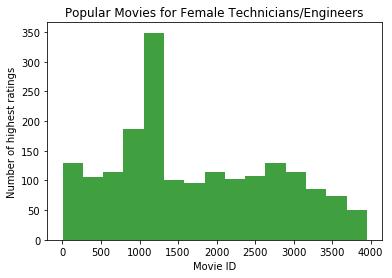

the index is:  1073
you can see that there is a discrepency with the index
The top movie is:  [1089L 'Reservoir Dogs (1992)' 'Crime|Thriller']


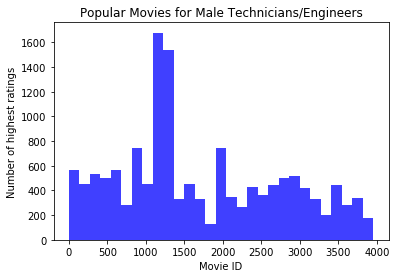

the index is:  1923
you can see that there is a discrepency with the index
The top movie is:  [1992L "Child's Play 2 (1990)" 'Horror']


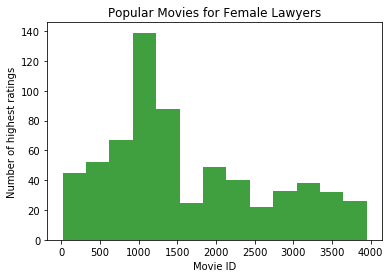

the index is:  914
The top movie is:  [926L 'All About Eve (1950)' 'Drama']


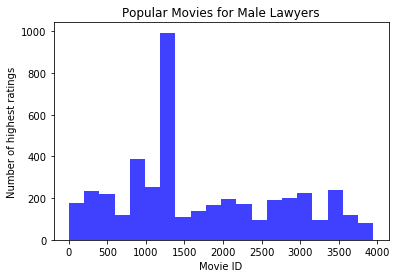

the index is:  3364
The top movie is:  [3433L 'Death Wish 4: The Crackdown (1987)' 'Action|Drama']


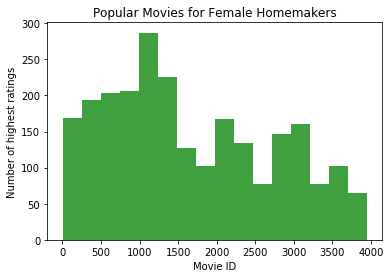

the index is:  48
The top movie is:  [49L 'When Night Is Falling (1995)' 'Drama|Romance']


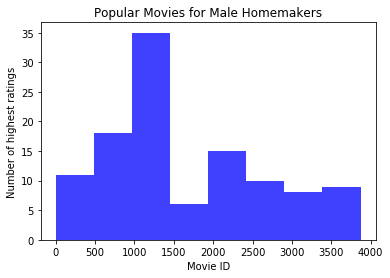

the index is:  3871
The top movie is:  [3941L 'Sorority House Massacre (1986)' 'Horror']


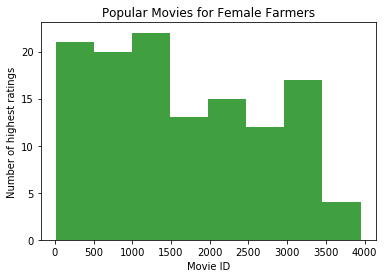

the index is:  913
The top movie is:  [925L 'Golden Earrings (1947)' 'Adventure|Romance']


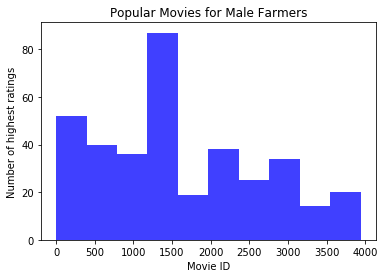

the index is:  1196
The top movie is:  [1214L 'Alien (1979)' 'Action|Horror|Sci-Fi|Thriller']


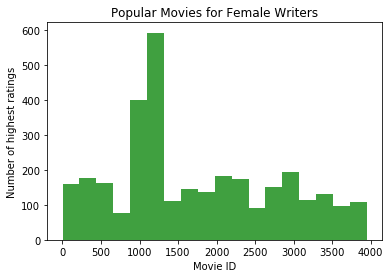

the index is:  2139
The top movie is:  [2208L 'Lady Vanishes, The (1938)' 'Comedy|Mystery|Romance|Thriller']


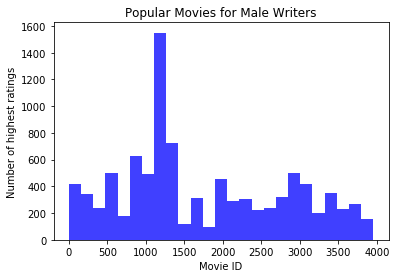

the index is:  3083
The top movie is:  [3152L 'Last Picture Show, The (1971)' 'Drama']
The problem with the index is just invisible to me right now.
******************** end *****************************


In [16]:
import io
import csv
import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
from pandas import Series
from pandas import DataFrame as df
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# ************** Read the data files ***************** 

# For each datafile define a path, create a header, include how the data is 
# separated with the "sep" parameter, and attach the header

# **Read the data for the people
column_names = ['ID', 'Gender', 'Age', 'Occupation', 'Zip']
path = 'movielens/users.dat'
people = pd.read_csv(path, sep='\::', header=None, names=column_names)

# **Read the data for how the people rate movies
column_names = ['ID', 'MovieID', 'Rating', 'Timestamp'] 
path = 'movielens/ratings.dat'
ratings = pd.read_csv(path, sep='\::', header=None, names=column_names)

# **Read the data for the movies
column_names = ['MovieID', 'Title', 'Genres'] 
path = 'movielens/movies.dat'
movies = pd.read_csv(path, sep='\::', header=None, names=column_names)

#*************** now we have the data ***********************

#****************** filter the data ***************************

# Separate the males and the females
females = people[people.Gender=='F']
males = people[people.Gender=='M']

# Pick some occupations
# 17 is technician/engineer
femtech = females[females.Occupation==17]
maletech = males[males.Occupation==17]

# 11 is lawyer
femlawyer = females[females.Occupation==11]
malelawyer = males[males.Occupation==11]
# 9 is homemaker
femhomemaker = females[females.Occupation==9]
malehomemaker = males[males.Occupation==9]
# 8 is farmer
femfarmer = females[females.Occupation==8]
malefarmer = males[males.Occupation==8]
# 20 is writter
femwriter = females[females.Occupation==20]
malewriter = males[males.Occupation==20]

# Choose only the best rated movies
ratings5 = ratings[ratings.Rating==5]

#************** look at the data ************************

# Merge the female and male data with the movie rating data
femtech_movie = femtech.merge(ratings5, left_on='ID', right_on='ID', how='inner')
maletech_movie = maletech.merge(ratings5, left_on='ID', right_on='ID', how='inner')

femlawyer_movie = femlawyer.merge(ratings5, left_on='ID', right_on='ID', how='inner')
malelawyer_movie = malelawyer.merge(ratings5, left_on='ID', right_on='ID', how='inner')

femhomemaker_movie = femhomemaker.merge(ratings5, left_on='ID', right_on='ID', how='inner')
malehomemaker_movie = malehomemaker.merge(ratings5, left_on='ID', right_on='ID', how='inner')

femfarmer_movie = femfarmer.merge(ratings5, left_on='ID', right_on='ID', how='inner')
malefarmer_movie = malefarmer.merge(ratings5, left_on='ID', right_on='ID', how='inner')

femwriter_movie = femwriter.merge(ratings5, left_on='ID', right_on='ID', how='inner')
malewriter_movie = malewriter.merge(ratings5, left_on='ID', right_on='ID', how='inner')

# Make arrays of the number of movies for the histograms
femtech_movieID = femtech_movie['MovieID'].values
maletech_movieID = maletech_movie['MovieID'].values

femlawyer_movieID = femlawyer_movie['MovieID'].values
malelawyer_movieID = malelawyer_movie['MovieID'].values

femhomemaker_movieID = femhomemaker_movie['MovieID'].values
malehomemaker_movieID = malehomemaker_movie['MovieID'].values

femfarmer_movieID = femfarmer_movie['MovieID'].values
malefarmer_movieID = malefarmer_movie['MovieID'].values

femwriter_movieID = femwriter_movie['MovieID'].values
malewriter_movieID = malewriter_movie['MovieID'].values

# Make movies into an array to find the name of the most popular movie movie
movie_array = np.asarray(movies)

# Construct histograms of the movies rated at 5 by the categories

# female technician/engineer
n, bins, patches = plt.hist(femtech_movieID, bins='auto', facecolor='green', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Female Technicians/Engineers')
plt.show()
elem = np.argmax(n) # the element with the most counts
index = femtech_movieID[elem]  
print 'the index is: ', index         # this part of the program is not working quite right - 
print 'you can see that there is a discrepency with the index'
print 'The top movie is: ', movie_array[index]

# male technician/engineer
n, bins, patches = plt.hist(maletech_movieID, bins='auto', facecolor='blue', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Male Technicians/Engineers')
plt.show()
elem = np.argmax(n)
index = maletech_movieID[elem]
print 'the index is: ', index
print 'you can see that there is a discrepency with the index'
print 'The top movie is: ', movie_array[index]

# female lawyer
n, bins, patches = plt.hist(femlawyer_movieID, bins='auto', facecolor='green', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Female Lawyers')
plt.show()
elem = np.argmax(n)
index = femlawyer_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]

# male lawyer
n, bins, patches = plt.hist(malelawyer_movieID, bins='auto', facecolor='blue', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Male Lawyers')
plt.show()
elem = np.argmax(n)
index = malelawyer_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]

# female homemaker
n, bins, patches = plt.hist(femhomemaker_movieID, bins='auto', facecolor='green', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Female Homemakers')
plt.show()
elem = np.argmax(n)
index = femhomemaker_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]
                            
# male homemaker
n, bins, patches = plt.hist(malehomemaker_movieID, bins='auto', facecolor='blue', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Male Homemakers')
plt.show()
elem = np.argmax(n)
index = malehomemaker_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]

# female farmer
n, bins, patches = plt.hist(femfarmer_movieID, bins='auto', facecolor='green', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Female Farmers')
plt.show()
elem = np.argmax(n)
index = femfarmer_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]
                            
# male farmer
n, bins, patches = plt.hist(malefarmer_movieID, bins='auto', facecolor='blue', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Male Farmers')
plt.show()
elem = np.argmax(n)
index = malefarmer_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]

# female writer
n, bins, patches = plt.hist(femwriter_movieID, bins='auto', facecolor='green', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Female Writers')
plt.show()
elem = np.argmax(n)
index = femwriter_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]
                            
# male writer
n, bins, patches = plt.hist(malewriter_movieID, bins='auto', facecolor='blue', alpha=0.75)
plt.xlabel('Movie ID')
plt.ylabel('Number of highest ratings')
plt.title(r'Popular Movies for Male Writers')
plt.show()
elem = np.argmax(n)
index = malewriter_movieID[elem]
print 'the index is: ', index
print 'The top movie is: ', movie_array[index]
print 'The problem with the index is just invisible to me right now.'
print '******************** end *****************************'
